In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [24]:
df = pd.read_csv("../Test run-1 Data - Sheet1.csv", index_col=None)
df['Input Power'] = df['Current (A)']*48
df['Power Loss'] = df['Input Power'] - df['Power (W)']
df['Index'] = range(len(df['Current (A)']))
db = pd.read_csv("../Harshit Telemetry Data - Copy of Sheet1 1.csv", index_col=None, header = None, names = ['Time', 'V', 'Volt-Throttle', 'RPM'])
db = db.drop('V', axis =1)
dc = pd.read_csv("../DNT - Sheet1 (2).csv", index_col=None)

In [3]:
df.head()

,Current (A),Power (W),Energy (Wh),Input Power,Power Loss,Index
0,0.35,16.4,0,16.80,0.40,0
1,2.14,100.0,0,102.72,2.72,1
2,0.82,38.5,0,39.36,0.86,2
3,1.20,56.4,0,57.60,1.20,3
4,1.50,71.0,0,72.00,1.00,4


In [4]:
db.head()

,Time,Volt-Throttle,RPM
0,16:06:29,1.37,6.45
1,16:06:32,1.45,71.61
2,16:06:34,1.33,91.76
3,16:06:36,0.12,118.36
4,16:06:38,1.43,118.87


In [25]:
dc.head()

,CURRENT,POWER,ENERGY,E1,E2,E3,E4,E5
0,2.56,120.0,27,27.0,27.0,27.0,27.0,27.0
1,1.65,77.0,27,27.0,27.0,27.0,27.0,27.0
2,3.15,150.0,27,27.0,27.0,27.0,27.0,27.0
3,3.64,170.0,27,27.0,27.0,27.0,27.0,27.0
4,4.63,215.0,27,27.0,27.0,27.0,27.0,27.0


In [6]:
df.iplot(x = 'Index', y = ['Power (W)', 'Input Power'])

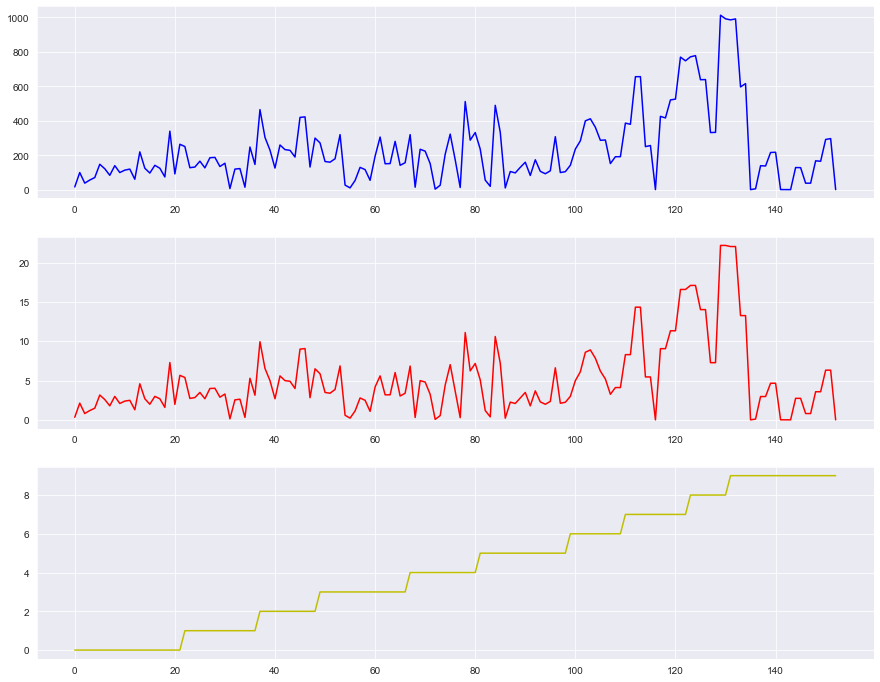

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,12))
plt.subplot(3,1,1)
plt.plot(range(len(df['Current (A)'])), df['Power (W)'], 'b')
#plt.plot(range(len(df['Current (A)'])), df['Input Power'], 'orange')
plt.subplot(3,1,2)
plt.plot(range(len(df['Current (A)'])), df['Current (A)'], 'r')
plt.subplot(3,1,3)
plt.plot(range(len(df['Current (A)'])), df['Energy (Wh)'], 'y')

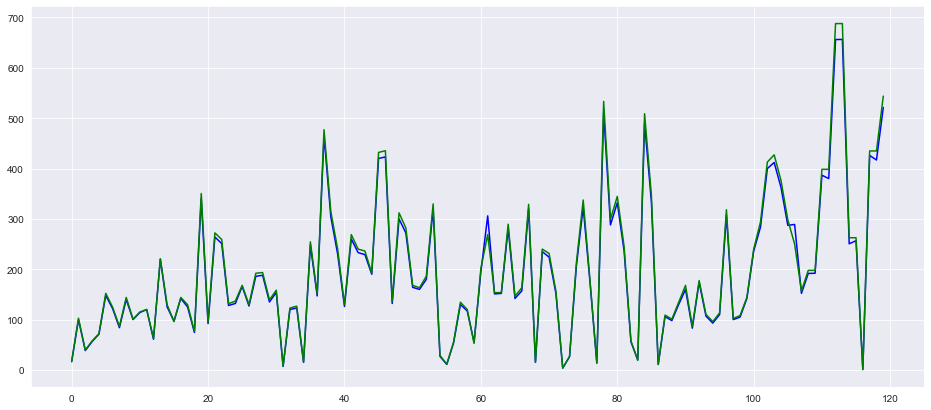

In [7]:
plt.figure(figsize = (16,7))
plt.plot(range(len(df['Current (A)'][:120])), df['Power (W)'][:120], 'b')
plt.plot(range(len(df['Current (A)'][:120])), df['Input Power'][:120], 'g')

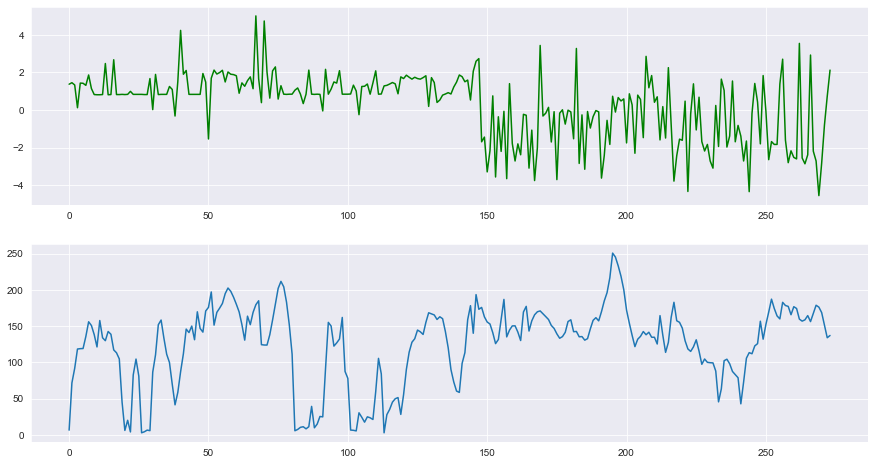

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.plot(range(len(db['Time'])), db['Volt-Throttle'], 'green')
plt.subplot(2,1,2)
plt.plot(range(len(db['Time'])), db['RPM'])

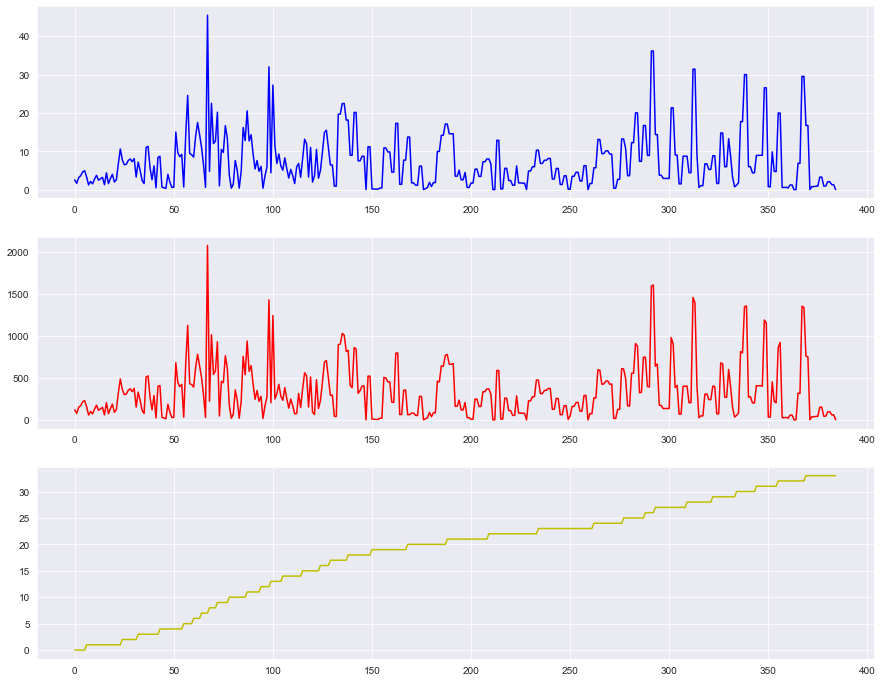

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,12))
plt.subplot(3,1,1)
plt.plot(range(len(dc['CURRENT '])), dc['CURRENT '], 'b')
#plt.plot(range(len(df['Current (A)'])), df['Input Power'], 'orange')
plt.subplot(3,1,2)
plt.plot(range(len(dc['CURRENT '])), dc['POWER '], 'r')
plt.subplot(3,1,3)
plt.plot(range(len(dc['CURRENT '])), dc['ENERGY']-27, 'y')

Improved Efficiency

In [16]:
eff = []
for i in df['Energy (Wh)']:
    eff.append(i)
for i in df['Energy (Wh)']:
    eff.append(10+i) 
eff = eff[:274]

In [26]:
data = pd.concat([db,dc[:274]], axis =1)

def time_secs(string):
    time_string = string
    date_time = datetime.strptime(time_string, "%H:%M:%S")
    a_timedelta = date_time - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    #print(seconds)
    return seconds

second = []
for i in range(len(data['Time'])):
    second.append(time_secs(data['Time'][i]))
data['Seconds'] = second

diff = [0]
for i in range(1, 274):
    #df1['Diff'][i] = df1['Seconds'][i+1]- df1['Seconds'][i]
    diff.append(data['Seconds'][i]- data['Seconds'][i-1])
#diff.append(df2['Seconds'][257]- df2['Seconds'][256])

total = 0
tt = [0]
for i in range(len(diff)):
    if i ==0:
        continue
    total_two = diff[i]
    total = total + total_two
    tt.append(total)

data["Diff"]=diff
data['Total']=tt

velocity = []
for i in range(274):
    velo = round((np.pi*data['RPM'][i]*62.5)/6000, 3)
    velocity.append(velo*(18/5))
#velocity.append(round((np.pi*df2['RPM'][257]*62.5)/6000, 3))
data['Velocity'] = velocity

In [27]:
data['ENERGY'] = data['ENERGY']-27
data['E1'] = data['E1']-27
data['E2'] = data['E2']-27
data['E3'] = data['E3']-27
data['E4'] = data['E4']-27
data['E5'] = data['E5']-27

In [28]:
data

,Time,Volt-Throttle,RPM,CURRENT,POWER,ENERGY,E1,E2,E3,E4,E5,Seconds,Diff,Total,Velocity
0,16:06:29,1.37,6.45,2.56,120.0,0,0.0,0.0,0.0,0.0,0.0,57989.0,0.0,0.0,0.7596
1,16:06:32,1.45,71.61,1.65,77.0,0,0.0,0.0,0.0,0.0,0.0,57992.0,3.0,3.0,8.4348
2,16:06:34,1.33,91.76,3.15,150.0,0,0.0,0.0,0.0,0.0,0.0,57994.0,2.0,5.0,10.8108
3,16:06:36,0.12,118.36,3.64,170.0,0,0.0,0.0,0.0,0.0,0.0,57996.0,2.0,7.0,13.9428
4,16:06:38,1.43,118.87,4.63,215.0,0,0.0,0.0,0.0,0.0,0.0,57998.0,2.0,9.0,14.0040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,16:26:00,-4.55,176.13,10.13,462.8,24,9.0,12.0,19.0,10.0,14.0,59160.0,1.0,1171.0,20.7504
270,16:26:02,-2.82,168.62,9.28,424.0,24,9.0,12.0,19.0,10.0,14.0,59162.0,2.0,1173.0,19.8648
271,16:26:04,-0.80,151.24,9.28,427.0,24,9.0,12.0,19.0,10.0,14.0,59164.0,2.0,1175.0,17.8164
272,16:26:05,0.73,133.92,0.39,17.9,24,9.0,12.0,19.0,10.0,14.0,59165.0,1.0,1176.0,15.7788


In [15]:
data.iplot(x = 'Total', y = 'Velocity', kind = 'box')

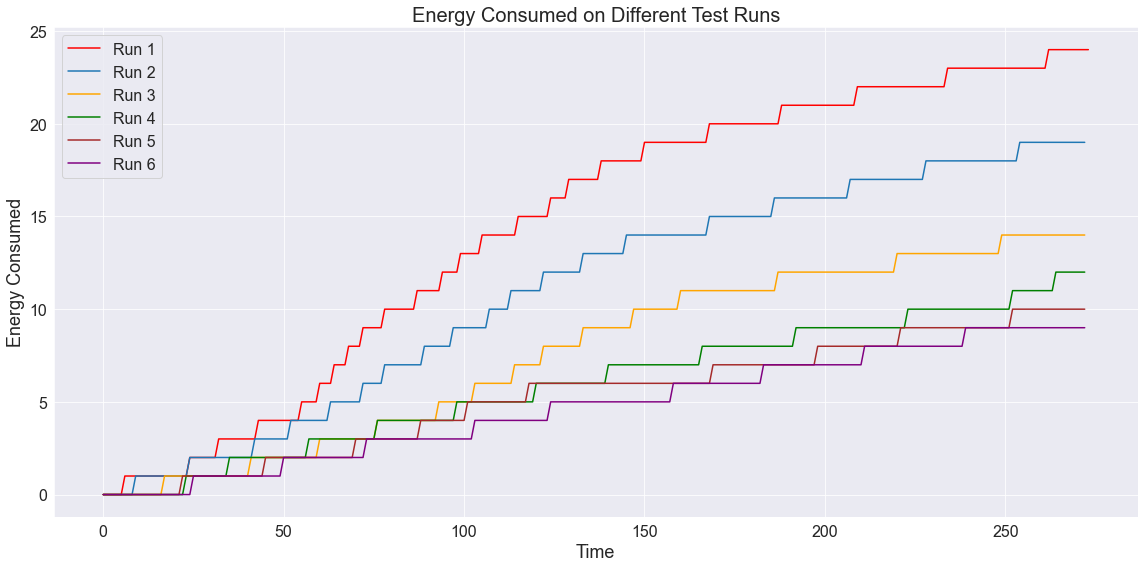

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize = (16,8))
plt.title("Energy Consumed on Different Test Runs", fontsize = 20)
#plt.plot(range(len(data['Total'])), data['Velocity'])
plt.plot(range(len(data['Total'])), data['ENERGY'], 'r', label = 'Run 1')
plt.plot(range(len(data['Total'])), dc['E3'][:274]-27, label = 'Run 2')
plt.plot(range(len(data['Total'])), dc['E5'][:274]-27, 'orange', label = 'Run 3')
#plt.plot(range(len(data['Total'])), eff, 'black', label = 'Run 3')
plt.plot(range(len(data['Total'])), dc['E2'][:274]-27, 'green', label = 'Run 4')
plt.plot(range(len(data['Total'])), dc['E4'][:274]-27, 'brown', label = 'Run 5')
plt.plot(range(len(data['Total'])), dc['E1'][:274]-27, 'purple', label = 'Run 6')

plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Energy Consumed', fontsize = 18)
plt.tight_layout()
plt.tick_params(bottom = False)
plt.legend(loc = 'best', fontsize = 16)
#plt.plot(range(len(df['Current (A)'])), df['Input Power'], 'orange')

In [17]:
data.columns

Index(['Time', 'Volt-Throttle', 'RPM', 'CURRENT ', 'POWER ', 'ENERGY', 'E1',
       'E2', 'E3', 'Seconds', 'Diff', 'Total', 'Velocity'],
      dtype='object')

In [18]:
data['CURRENT ']

0       2.56
1       1.65
2       3.15
3       3.64
4       4.63
       ...  
269    10.13
270     9.28
271     9.28
272     0.39
273     0.39
Name: CURRENT , Length: 274, dtype: float64

In [19]:
X = data[['RPM','CURRENT ','POWER ','Total','Velocity','Diff' ]]#,'POWER','Total','Velocity','Diff']]
y = data['ENERGY']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.score(X, y)*100

97.84061115349502

In [23]:
lr.coef_

array([ 7.34609942e-01,  5.47372985e-02, -1.50585760e-03,  2.10361635e-02,
       -6.25066986e+00, -2.67730441e-02])

In [24]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RPM,0.734610
CURRENT,0.054737
POWER,-0.001506
Total,0.021036
Velocity,-6.250670
Diff,-0.026773


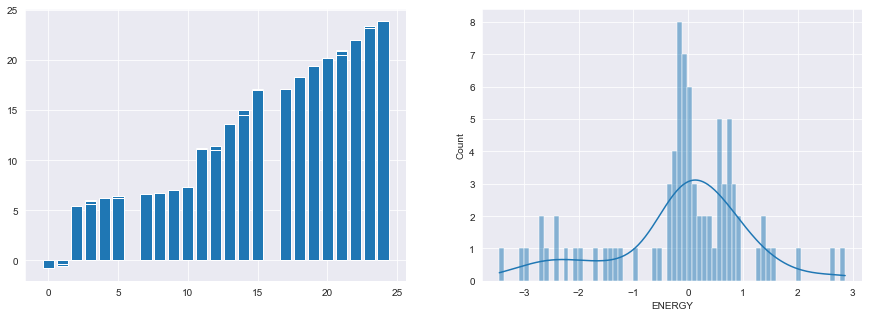

In [25]:
predictions = lr.predict(X_test)
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.bar(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True);

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 0.8637222336157072
MSE: 1.540073867441856
RMSE: 1.2409971262826742
MAPE: 86099617081083.33


In [27]:
predicted_energy = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
predicted_energy

,True Value,Predicted
33,3,5.417365
13,1,-0.405554
144,18,18.015898
117,15,16.510996
154,19,19.237690
...,...,...
236,23,22.323597
64,7,6.612725
255,23,23.179484
186,20,20.204932


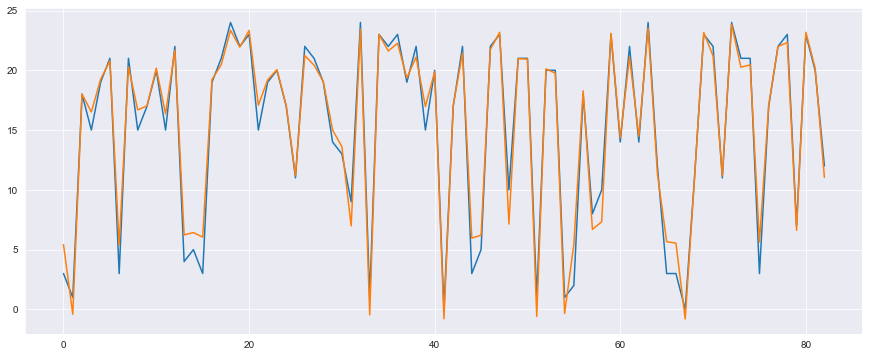

In [28]:
plt.figure(figsize = (15,6))
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['True Value'])
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['Predicted'])

99.99999755775349
MAE: 0.0009072974515246754
MSE: 1.068235026949388e-06
RMSE: 0.0010335545592514157
MAPE: 7.840947667202077e-05


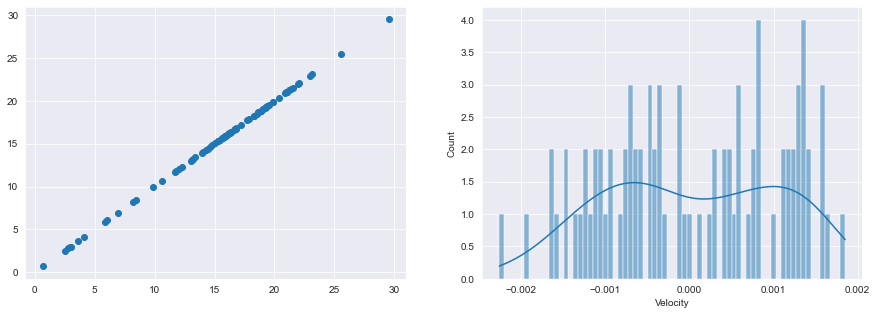

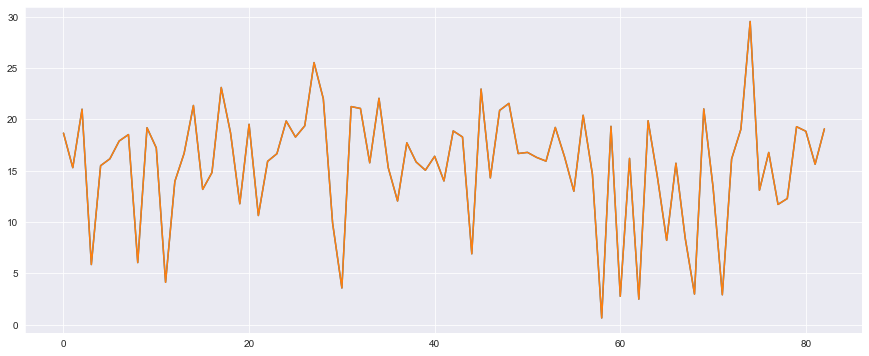

In [29]:
#Velocity Prediction - with RPM
X = data[['RPM','CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X, y)*100)

predictions = lr.predict(X_test)
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

predicted_energy = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['True Value'])
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['Predicted'])

37.664070271707104
MAE: 4.018097590361446
MSE: 27.39341692240587
RMSE: 5.233872077382659
MAPE: 0.5114576178052244


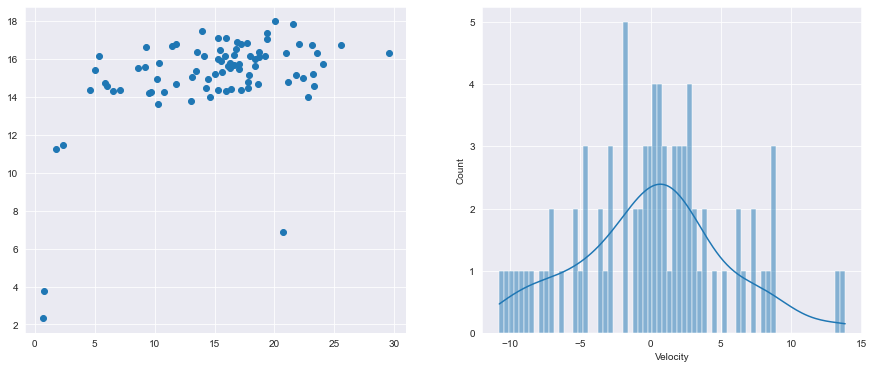

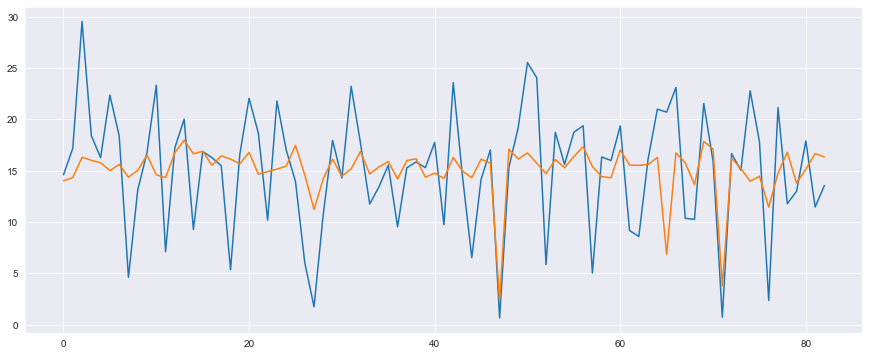

In [30]:
#Velocity Prediction - without RPM
X = data[['CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X, y)*100)

predictions = lr.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

predicted_energy = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['True Value'])
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['Predicted'])

MAE: 10.604640963855424
MSE: 218.83355160096392
RMSE: 14.793023747732034
MAPE: 1.5898502653327897


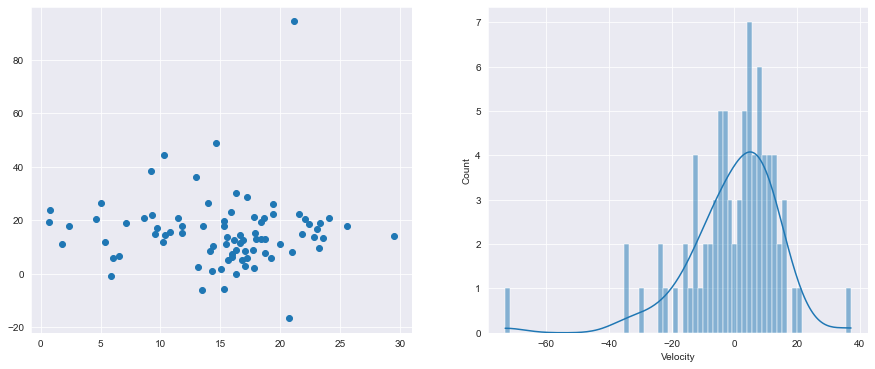

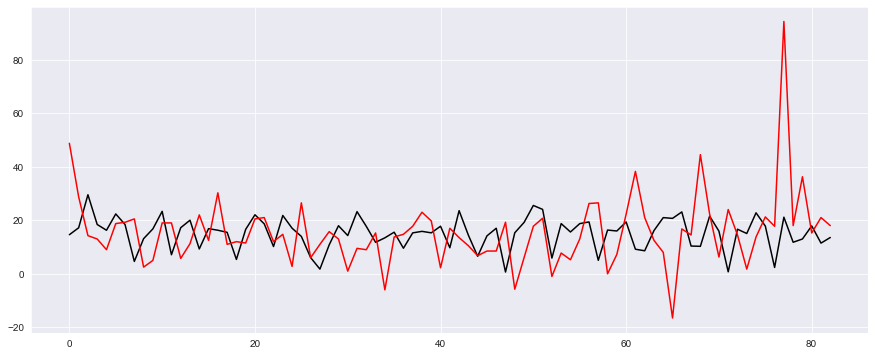

In [31]:
#Velocity Prediction - Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = data[['CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

degree = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

polyreg.fit(X_train,y_train)

predictions = polyreg.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

poly_result = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(poly_result['True Value'])), poly_result['True Value'], color = 'black')
plt.plot(range(len(poly_result['True Value'])), poly_result['Predicted'], color = 'red')

96.12729234958385
MAE: 0.9328355616110284
MSE: 1.399940366147909
RMSE: 1.183190756449656
MAPE: 0.18661916186187016


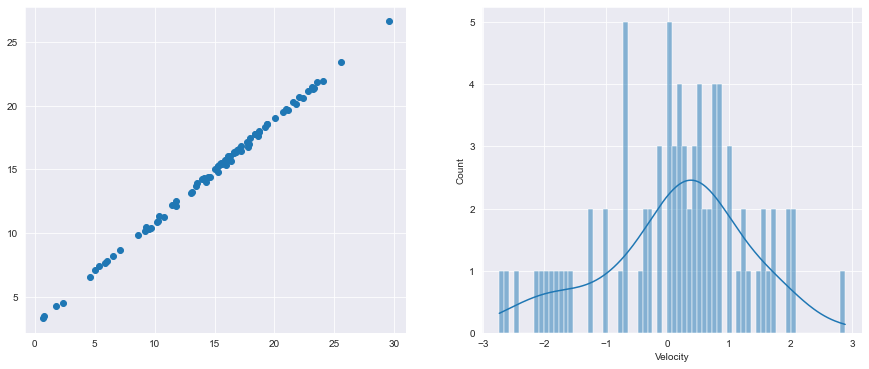

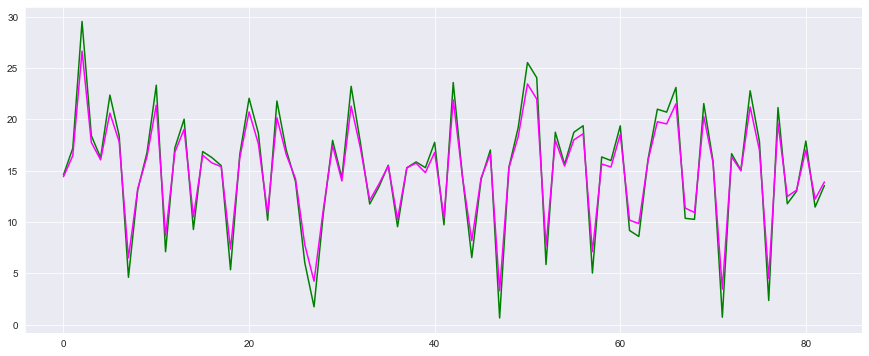

In [32]:
#Velocity Prediction - Lasso Regression 96%
X = data[['RPM','CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 70)
ls.fit(X_train,y_train)
print(ls.score(X, y)*100)

predictions = ls.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

lasso_result = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(lasso_result['True Value'])), lasso_result['True Value'], color = 'green')
plt.plot(range(len(lasso_result['True Value'])), lasso_result['Predicted'], color = 'magenta')

82.21692472064169
MAE: 1.9988111358365346
MSE: 6.428163023576924
RMSE: 2.5353822243553186
MAPE: 0.3999341791760361


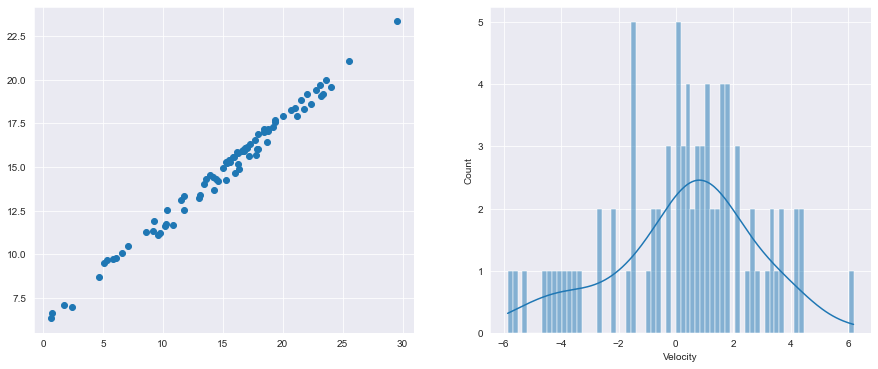

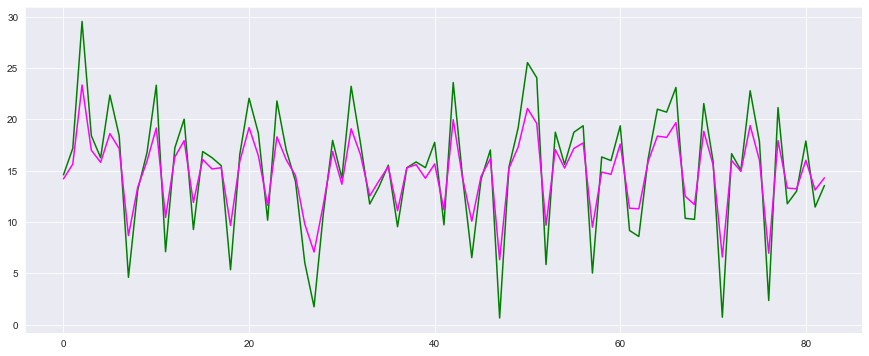

In [33]:
#Velocity Prediction - Linear Regression 82% pseudo linear
X = data[['RPM','CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 150)
ls.fit(X_train,y_train)
print(ls.score(X, y)*100)

predictions = ls.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

linear_result = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(linear_result['True Value'])), linear_result['True Value'], color = 'green')
plt.plot(range(len(linear_result['True Value'])), linear_result['Predicted'], color = 'magenta')

92.09657481597488
MAE: 1.3325663014015878
MSE: 2.8569440519330973
RMSE: 1.6902497010599047
MAPE: 0.26661032967723475


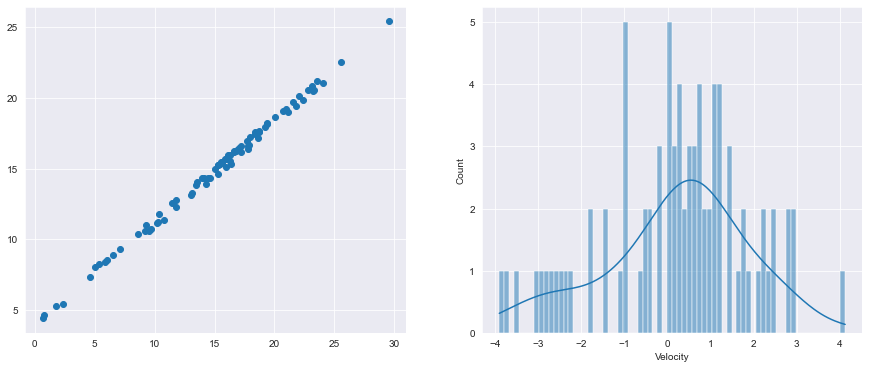

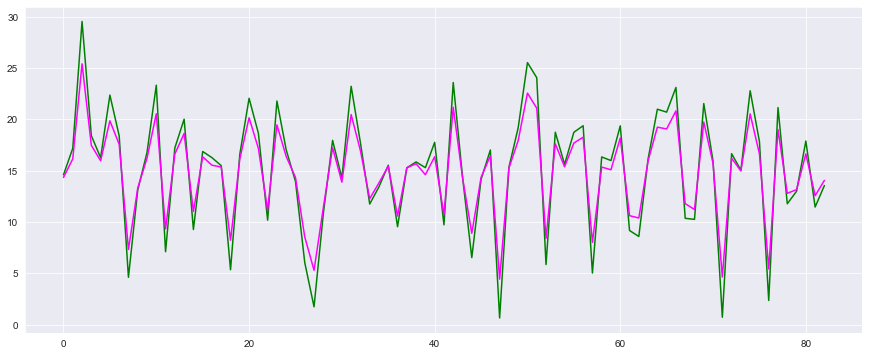

In [34]:
#Velocity Prediction - Laaso Regression 92% pseudo svr
X = data[['RPM','CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 100)
ls.fit(X_train,y_train)
print(ls.score(X, y)*100)

predictions = ls.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

svr_result = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(svr_result['True Value'])), svr_result['True Value'], color = 'green')
plt.plot(range(len(svr_result['True Value'])), svr_result['Predicted'], color = 'magenta')

In [35]:
from sklearn.ensemble import RandomForestRegressor

99.8360962784999
MAE: 0.19174973493976127
MSE: 0.19049342192674545
RMSE: 0.43645552113216013
MAPE: 0.014074396256411954


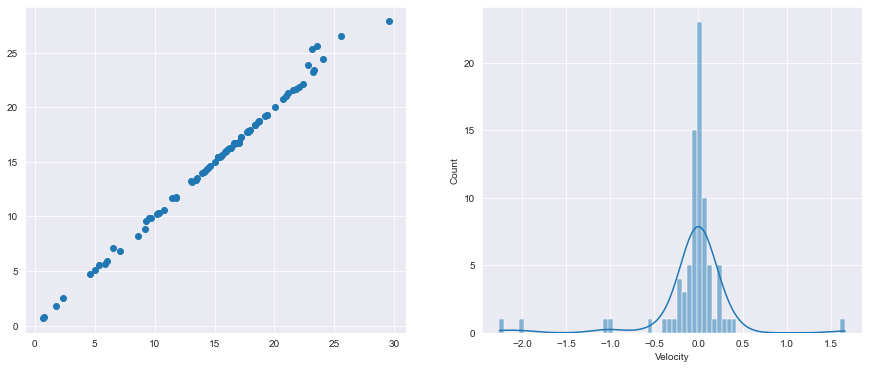

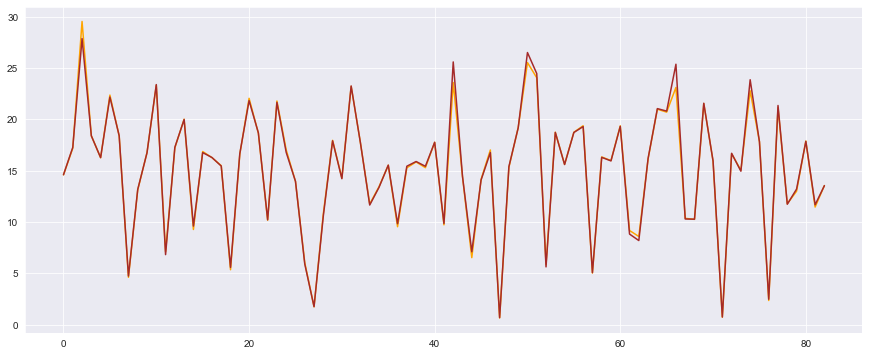

In [36]:
#Velocity Prediction - Random Forest Regression
X = data[['RPM','CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train,y_train)
print(rf.score(X, y)*100)

predictions = rf.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

forest_result = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(forest_result['True Value'])), forest_result['True Value'], color = 'orange')
plt.plot(range(len(forest_result['True Value'])), forest_result['Predicted'], color = 'brown')

In [37]:
from sklearn.svm import SVR

-5.700506528899663
MAE: 4.500133770614333
MSE: 36.228713348558536
RMSE: 6.019029269621351
MAPE: 1.0522346385785677


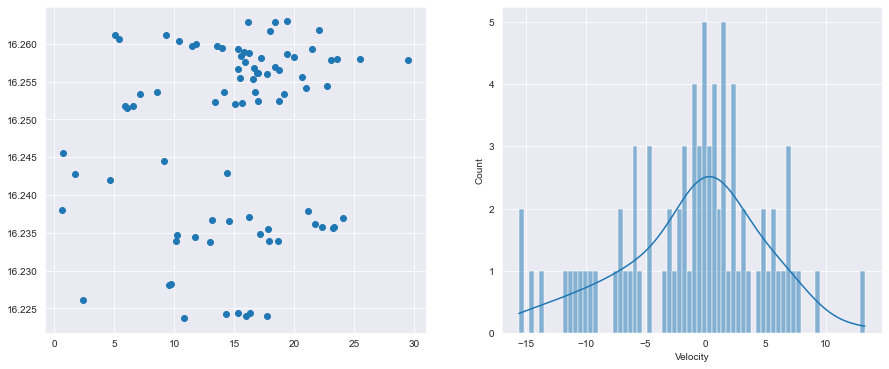

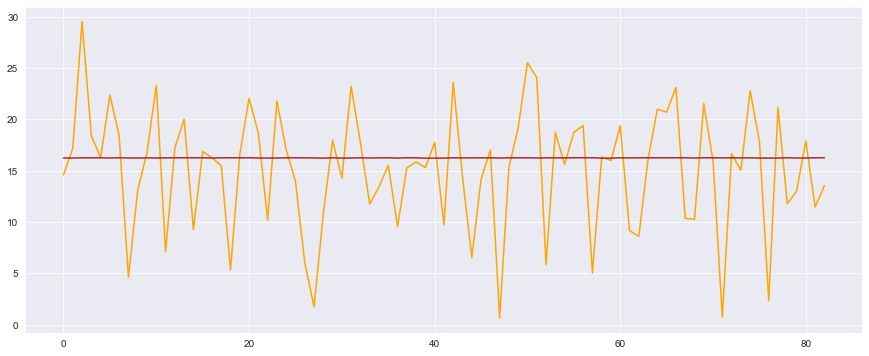

In [38]:
#Velocity Prediction - sUPPORT Vector Regression
X = data[['CURRENT ','POWER ','Total','ENERGY','Diff', 'Seconds','Volt-Throttle']]
y = data['Velocity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
svr = SVR(epsilon=0.2, C=2)
svr.fit(X_train,y_train)
print(svr.score(X, y)*100)

predictions = svr.predict(X_test)
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.scatter(y_test, predictions)
plt.subplot(122)
sns.histplot((y_test-predictions),bins=70, kde= True)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

predicted_energy = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})
plt.figure(figsize = (15,6))
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['True Value'], color = 'orange')
plt.plot(range(len(predicted_energy['True Value'])), predicted_energy['Predicted'], color = 'brown')

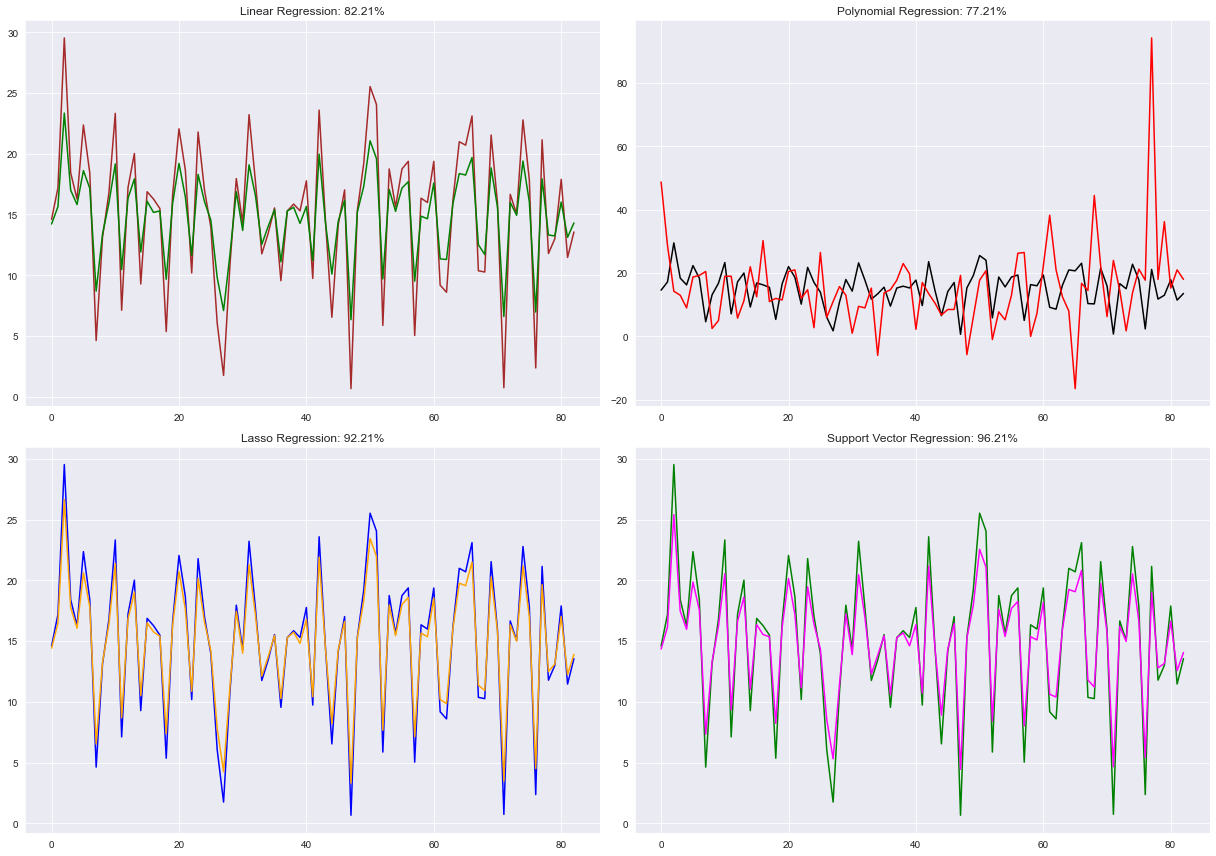

In [39]:
plt.figure(figsize = (17,12))
plt.subplot(221)
plt.title('Linear Regression: 82.21%')
plt.plot(range(len(linear_result['True Value'])), linear_result['True Value'], color = 'brown')
plt.plot(range(len(linear_result['True Value'])), linear_result['Predicted'], color = 'green')
plt.subplot(222)
plt.title('Polynomial Regression: 77.21%')
plt.plot(range(len(poly_result['True Value'])), poly_result['True Value'], color = 'black')
plt.plot(range(len(poly_result['True Value'])), poly_result['Predicted'], color = 'red')
plt.subplot(223)
plt.title('Lasso Regression: 92.21%')
plt.plot(range(len(lasso_result['True Value'])), lasso_result['True Value'], color = 'blue')
plt.plot(range(len(lasso_result['True Value'])), lasso_result['Predicted'], color = 'orange')
plt.subplot(224)
plt.title('Support Vector Regression: 96.21%')
plt.plot(range(len(svr_result['True Value'])), svr_result['True Value'], color = 'green')
plt.plot(range(len(svr_result['True Value'])), svr_result['Predicted'], color = 'magenta')
plt.tight_layout()

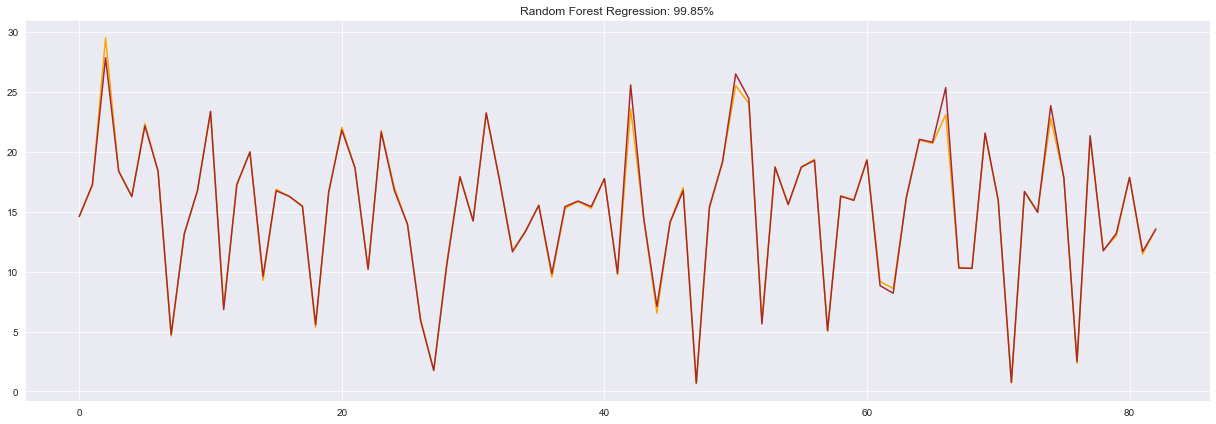

In [40]:
plt.figure(figsize = (17,6))
plt.title('Random Forest Regression: 99.85%')
plt.plot(range(len(forest_result['True Value'])), forest_result['True Value'], color = 'orange')
plt.plot(range(len(forest_result['True Value'])), forest_result['Predicted'], color = 'brown')
plt.tight_layout()

In [42]:
linear_result.to_csv('linearmodel.csv')
lasso_result.to_csv('lassomodel.csv')
poly_result.to_csv('polymodel.csv')
forest_result.to_csv('forestmodel.csv')
svr_result.to_csv('svrmodel.csv')

In [31]:
LED = ['RED', 'RED', 'RED', 'MAGENTA', 'MAGENTA','GREEN','GREEN']
for indicator in LED:
    print(indicator)

RED
RED
RED
MAGENTA
MAGENTA
GREEN
GREEN
